# Machine learning classification

Below is an example for using the `ml.classificator` class to classify spectral data.
It wraps scikit-learn algorithms in a similar way compared to the `rp.mlregression` class.
 
## Fake data generation

First we generate 5 fake signals that can be measured modulo some noise. More complex examples can be generated if wanted.

Number of samples = 100
Number of labels = 100


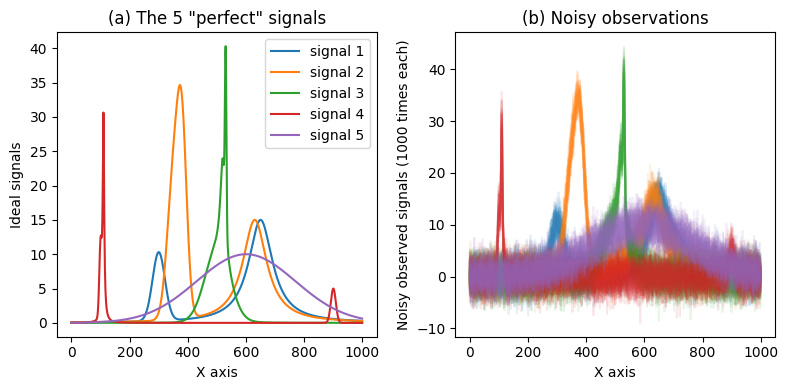

In [1]:
%matplotlib inline
import numpy as np
np.random.seed(42) # fixing the seed
import matplotlib.pyplot as plt
import rampy as rp
from sklearn.model_selection import train_test_split

# The X axis
x = np.arange(0, 1000, 1.0)

# The perfect 5 signals
spectra_1 = rp.gaussian(x, 10.0, 300., 25.) + rp.lorentzian(x, 15., 650., 50.)
spectra_2 = rp.gaussian(x, 20.0, 350., 25.) + rp.gaussian(x, 25.0, 380., 20.) + rp.lorentzian(x, 15., 630., 50.)
spectra_3 = rp.gaussian(x, 10.0, 500., 50.) + rp.lorentzian(x, 15.0, 520., 10.) + rp.gaussian(x, 25., 530., 3.)
spectra_4 = rp.gaussian(x, 10.0, 100., 5.) + rp.lorentzian(x, 30.0, 110., 3.) + rp.gaussian(x, 5., 900., 10.)
spectra_5 = rp.gaussian(x, 10.0, 600., 200.)

# the number of observations of each signal
number_of_spectra = 20

# generating a dataset (will be shuffled later during the train-test split)
dataset = np.hstack((np.ones((len(x),number_of_spectra))*spectra_1.reshape(-1,1),
                     np.ones((len(x),number_of_spectra))*spectra_2.reshape(-1,1),
                     np.ones((len(x),number_of_spectra))*spectra_3.reshape(-1,1),
                     np.ones((len(x),number_of_spectra))*spectra_4.reshape(-1,1),
                     np.ones((len(x),number_of_spectra))*spectra_5.reshape(-1,1)
                    )).T

# add noise
noise_scale = 2.0
dataset = dataset + np.random.normal(scale=noise_scale,size=(len(dataset),len(x)))

# create numeric labels
labels =  np.vstack((np.tile(np.array([1]).reshape(-1,1),number_of_spectra),
                     np.tile(np.array([2]).reshape(-1,1),number_of_spectra),
                     np.tile(np.array([3]).reshape(-1,1),number_of_spectra),
                     np.tile(np.array([4]).reshape(-1,1),number_of_spectra),
                     np.tile(np.array([5]).reshape(-1,1),number_of_spectra),
                    )).reshape(-1,1)

print('Number of samples = {}'.format(dataset.shape[0]))
print('Number of labels = {}'.format(labels.shape[0]))

# Do figure
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('(a) The 5 "perfect" signals')
plt.plot(x, spectra_1, label='signal 1')
plt.plot(x, spectra_2, label='signal 2')
plt.plot(x, spectra_3, label='signal 3')
plt.plot(x, spectra_4, label='signal 4')
plt.plot(x, spectra_5, label='signal 5')
plt.xlabel('X axis')
plt.ylabel('Ideal signals')
plt.legend()

plt.subplot(1,2,2)
plt.title('(b) Noisy observations')
plt.plot(x, dataset[0*number_of_spectra:1*number_of_spectra,:].T, color="C0",alpha=0.1)
plt.plot(x, dataset[1*number_of_spectra:2*number_of_spectra,:].T, color="C1",alpha=0.1)
plt.plot(x, dataset[2*number_of_spectra:3*number_of_spectra,:].T, color="C2",alpha=0.1)
plt.plot(x, dataset[3*number_of_spectra:4*number_of_spectra,:].T, color="C3",alpha=0.1)
plt.plot(x, dataset[4*number_of_spectra:5*number_of_spectra,:].T, color="C4",alpha=0.1)

plt.xlabel('X axis')
plt.ylabel('Noisy observed signals (1000 times each)')

plt.tight_layout()

## Machine Learning example of treatment

Below a quick example of how you will do a classification of the signals using scikit-learn functions.

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X = dataset
y = labels

# shufling
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

#
# TRain/Test split
#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#
# Initiate classifiers
#

# The classifiers with default parameters
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(), QuadraticDiscriminantAnalysis()]

# Their names
names = ["Nearest Neighbors", "SVC", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train.ravel())
    score = clf.score(X_test, y_test.ravel())
    print('\n- Classifier:'+name+' is scoring '+str(score)+'.')


- Classifier:Nearest Neighbors is scoring 1.0.

- Classifier:SVC is scoring 1.0.

- Classifier:Gaussian Process is scoring 0.09090909090909091.

- Classifier:Decision Tree is scoring 0.8787878787878788.

- Classifier:Random Forest is scoring 1.0.

- Classifier:Neural Net is scoring 1.0.


/home/charles/miniconda3/envs/gpvisc/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



- Classifier:AdaBoost is scoring 1.0.

- Classifier:Naive Bayes is scoring 1.0.

- Classifier:QDA is scoring 0.5757575757575758.


/home/charles/miniconda3/envs/gpvisc/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## ML classification with rampy

Now we use the rampy.mlclassificator to do the exact same thing as above, but in a more concise manner!

In [12]:
# initiate model
MLC = rp.mlclassificator(X_train, y_train, X_test = X_test, y_test=y_test, scaling=False)

# iterate over classifiers
for name in names:
    MLC.algorithm = name
    MLC.fit()
    score = MLC.model.score(MLC.X_test, MLC.y_test)
    print('\n- Classifier:'+name+' is scoring (test:) '+str(score)+'.')


- Classifier:Nearest Neighbors is scoring (test:) 1.0.

- Classifier:SVC is scoring (test:) 1.0.

- Classifier:Gaussian Process is scoring (test:) 0.09090909090909091.

- Classifier:Decision Tree is scoring (test:) 0.8787878787878788.

- Classifier:Random Forest is scoring (test:) 1.0.

- Classifier:Neural Net is scoring (test:) 1.0.


/home/charles/miniconda3/envs/gpvisc/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



- Classifier:AdaBoost is scoring (test:) 0.9696969696969697.

- Classifier:Naive Bayes is scoring (test:) 1.0.

- Classifier:QDA is scoring (test:) 0.5757575757575758.


/home/charles/miniconda3/envs/gpvisc/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


We obtain the same results, great! Now using mlclassificator, you can do automatic train/test split and scaling. Let's see if this improves the results from the Decision Tree classifier:

In [ ]:
# initiate model
MLC = rp.mlclassificator(X, y, 
                         scaling=True, 
                         test_size=0.33, 
                         random_state=42, 
                         algorithm = 'SVC')

MLC.fit()

# if you ask for scaling, do not forget to pass the scaled data to the model when scoring!!
score = MLC.model.score(MLC.X_test_sc, MLC.y_test)
print('\n- Classifier SVC is scoring (test:) '+str(score)+'.')


- Classifier SVC is scoring (test:) 1.0.


We can also try to tune the hyperparameters of other algorithms, such as Decision Tree:

In [28]:
# we define the _params as we would do with the scikit-learn class:
params = {'max_depth': 10}

# initiate model
MLC = rp.mlclassificator(X, y, 
                         scaling=True, 
                         test_size=0.33, 
                         random_state=42, 
                         algorithm = 'Decision Tree',
                         params_ = params)
MLC.fit()
score = MLC.model.score(MLC.X_test_sc, MLC.y_test)
print('\n- Classifier Decision Tree is scoring (test:) '+str(score)+'.')


- Classifier Decision Tree is scoring (test:) 0.8787878787878788.


We can also try to improve the Gaussian Process classifier using for instance the [Matern kernel](https://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels):

In [34]:
# we define the _params as we would do with the scikit-learn GP class:
# we actually will try a linear kernel
from sklearn.gaussian_process.kernels import Matern
params = {'kernel': 1.0*Matern()}

# initiate model
MLC = rp.mlclassificator(X, y, 
                         scaling=True, 
                         test_size=0.33, 
                         random_state=42, 
                         algorithm = 'Gaussian Process',
                         params_ = params)
MLC.fit()
score = MLC.model.score(MLC.X_test_sc, MLC.y_test)
print('\n- Classifier GP is scoring (test:) '+str(score)+'.')


- Classifier GP is scoring (test:) 1.0.
